In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import data

In [2]:
# load and see data 
fname = 'mcs_ds_edited_iter_shuffled.csv'
dataset = pd.read_csv(fname)
dataset

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943
...,...,...,...,...,...,...
102,18,23,100,20,1.287472,0.375227
103,14,17,200,60,0.899102,0.231822
104,15,20,100,50,1.171140,0.372001
105,20,20,100,40,1.234493,0.599834


In [3]:
# save ale column as numpy array
y_data = dataset["ale"].to_numpy()
np.shape(y_data)

(107,)

In [4]:
# save first two columns as numpy array
x_data = dataset.iloc[:, 0:4].to_numpy()
np.shape(x_data)

(107, 4)

# Linear model

In [5]:
# fit linear model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_data, y_data)

LinearRegression()

In [6]:
# calculate predictions and residuals
y_pred = reg.predict(x_data)
res = y_pred-y_data

Text(0, 0.5, 'frequency')

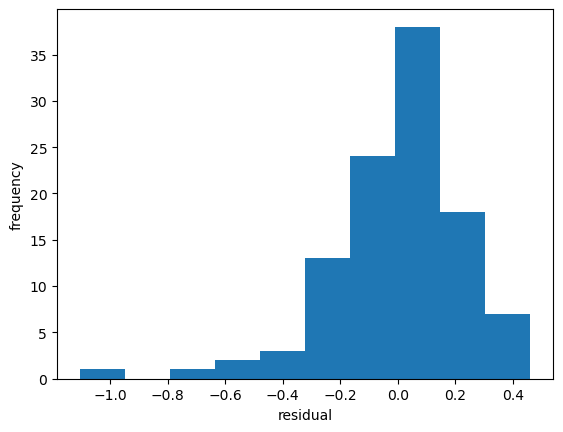

In [7]:
# plot residuals histogram
plt.hist(res)
plt.xlabel('residual')
plt.ylabel('frequency')

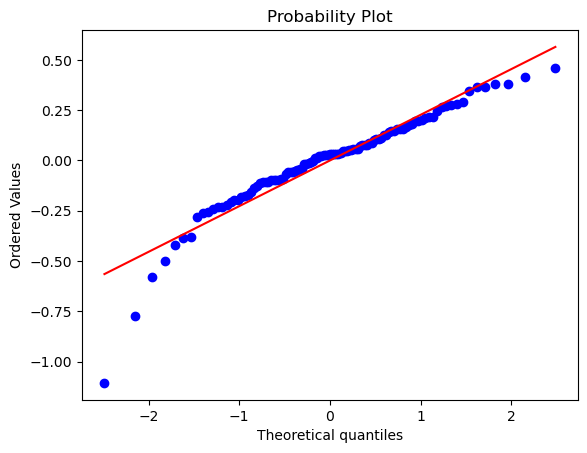

In [8]:
# plot qqplot
from scipy.stats import probplot
qqplot = probplot(res, plot=plt)

In [9]:
# normal test
from scipy.stats import normaltest
test = normaltest(res)
print(f'statistic (s^2 + k^2): {test.statistic}')
print(f'p value of chi^2 test: {test.pvalue}')

statistic (s^2 + k^2): 40.94240628750471
p value of chi^2 test: 1.2866767006283722e-09


pvalue from the chi^2 test is very small, and the statistic is huge. We can conclude that the residuals are most probably not normally distributed.

# SVM model

In [10]:
# fit svm regression model
from sklearn import svm
reg = svm.SVR()
reg.fit(x_data, y_data)

SVR()

In [11]:
# calculate predictions and residuals
y_pred = reg.predict(x_data)
res = y_pred-y_data

Text(0, 0.5, 'frequency')

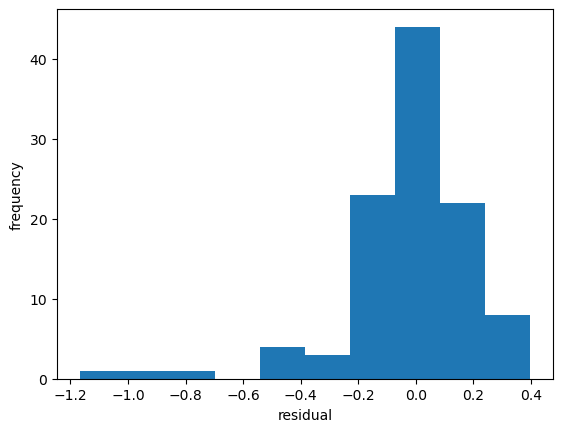

In [12]:
# plot residuals histogram
plt.hist(res)
plt.xlabel('residual')
plt.ylabel('frequency')

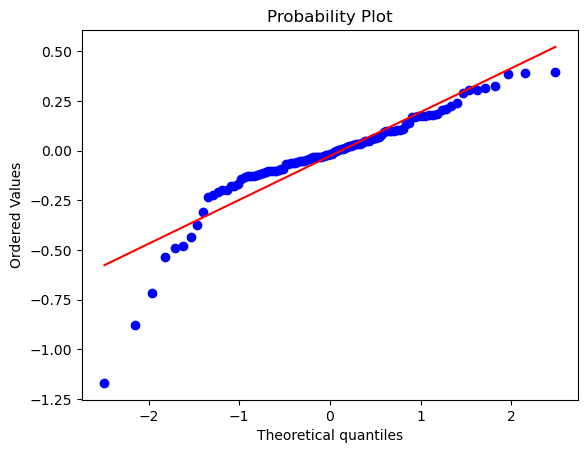

In [13]:
# plot qqplot
qqplot = probplot(res, plot=plt)

In [14]:
# normal test
test = normaltest(res)
print(f'statistic (s^2 + k^2): {test.statistic}')
print(f'p value of chi^2 test: {test.pvalue}')

statistic (s^2 + k^2): 54.30284227856083
p value of chi^2 test: 1.615428063977472e-12


pvalue from the chi^2 test is very small, and the statistic is huge. We can conclude that the residuals are most probably not normally distributed.

# NN model

In [15]:
# fit NN regression model
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor(
    random_state=1,
    hidden_layer_sizes=(10,),
    alpha=0.1, 
    max_iter=10000
).fit(x_data, y_data)

reg.score(x_data, y_data)

0.04309614071475654

In [16]:
# calculate predictions and residuals
y_pred = reg.predict(x_data)
res = y_pred-y_data

Text(0, 0.5, 'frequency')

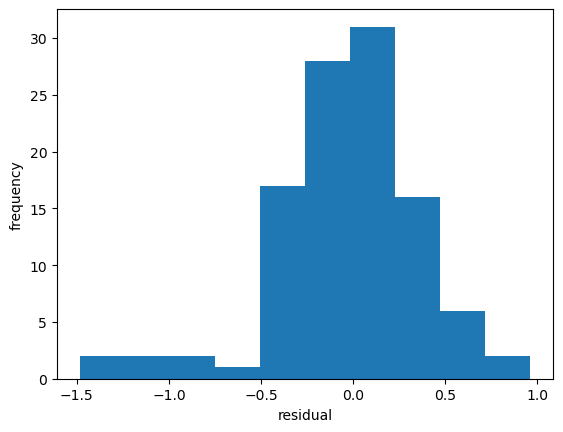

In [17]:
# plot residuals histogram
plt.hist(res)
plt.xlabel('residual')
plt.ylabel('frequency')

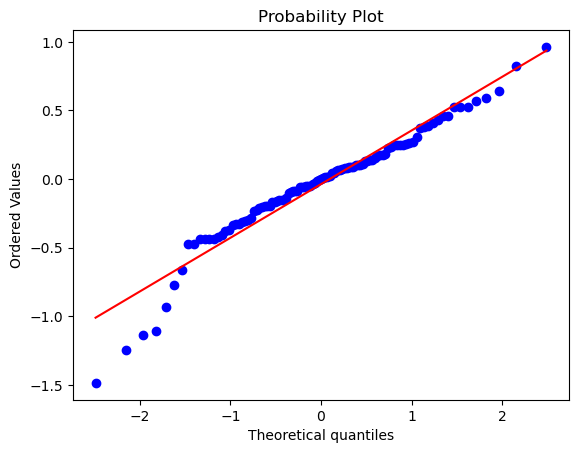

In [18]:
# plot qqplot
qqplot = probplot(res, plot=plt)

In [19]:
# normal test
test = normaltest(res)
print(f'statistic (s^2 + k^2): {test.statistic}')
print(f'p value of chi^2 test: {test.pvalue}')

statistic (s^2 + k^2): 20.06087579592484
p value of chi^2 test: 4.403887030689981e-05


pvalue from the chi^2 test is very small, and the statistic is huge. We can conclude that the residuals are most probably not normally distributed.